In [12]:
# Librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Cargar datos
data = pd.read_csv(r'C:\Users\neide\Desktop\HDD\UNIVERSIDAD\6 SEMESTRE\1- ANALISIS DE DATOS\4-ALGORITMOS DE APRENDIZAJE NO SUPERVISADO\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv')

In [30]:
data.head(35)

,Age,Annual Income (k$),Spending Score (1-100),Hierarchical_Cluster
0,19,15,39,0
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,0
5,22,17,76,1
6,35,18,6,0
7,23,18,94,1
8,64,19,3,0
9,30,19,72,1


In [31]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100),Hierarchical_Cluster
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,1.140000
std,13.969007,26.264721,25.823522,1.037198
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,1.000000
75%,49.000000,78.000000,73.000000,2.000000
max,70.000000,137.000000,99.000000,3.000000


In [14]:
# Exploración inicial de los datos
print(data.info())  # Información general
print(data.describe())  # Resumen estadístico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

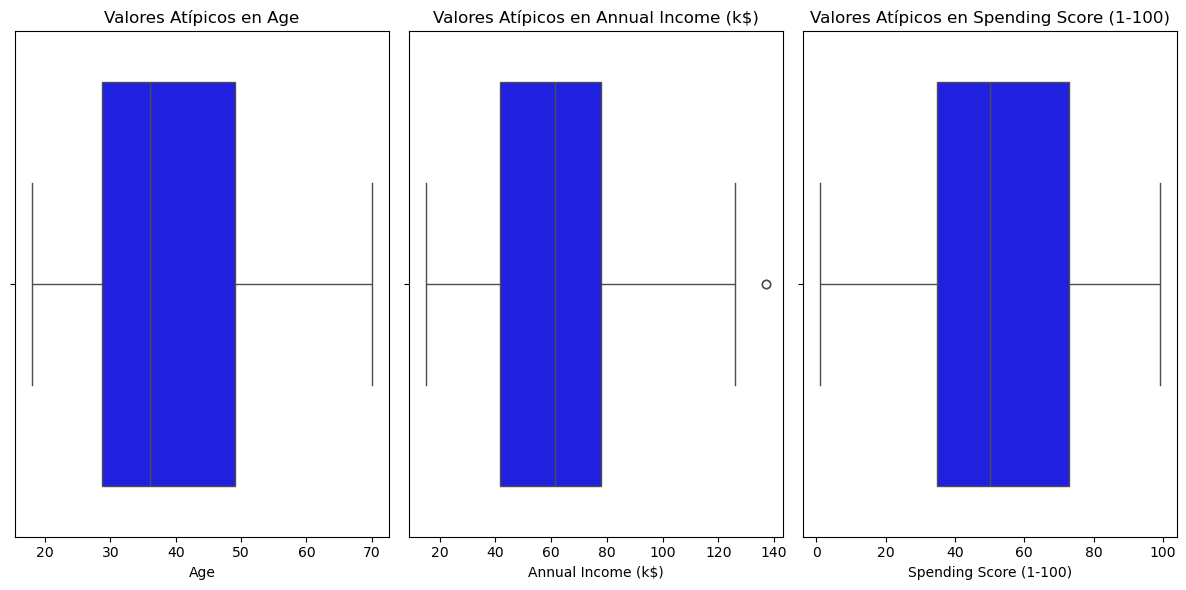

In [17]:
# Identificación de valores atípicos
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[col], color='blue')
    plt.title(f'Valores Atípicos en {col}')
plt.tight_layout()
plt.show()

In [21]:
# Selección de columnas relevantes
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [22]:
# Escalamiento de datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


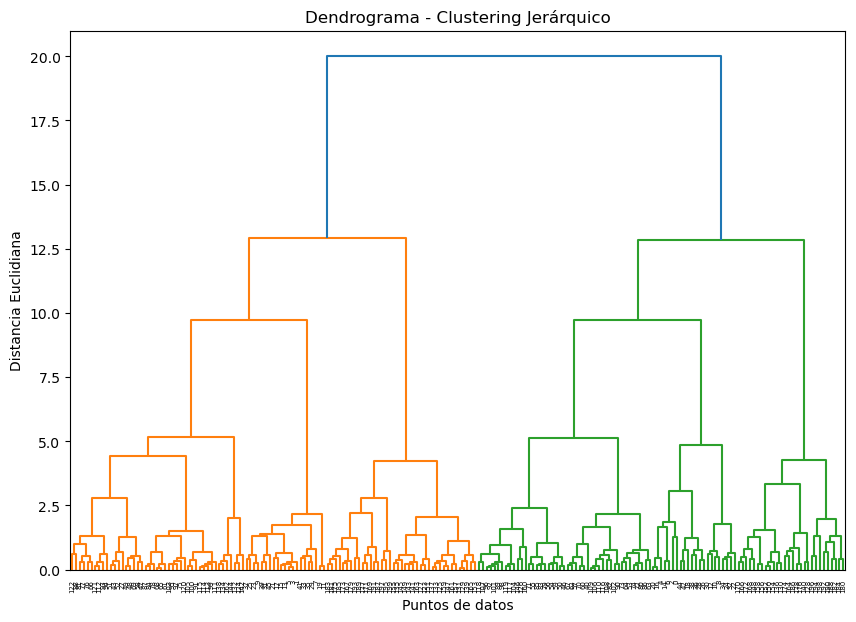

In [23]:
# Dendrograma para determinar el número óptimo de clusters
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [24]:
# Seleccionar el número óptimo de clusters (ajustar según el dendrograma)
optimal_clusters = 4

In [25]:
# Entrenamiento del modelo
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
data['Hierarchical_Cluster'] = hierarchical.fit_predict(data_scaled)

In [26]:
# Evaluación del modelo
silhouette_hierarchical = silhouette_score(data_scaled, data['Hierarchical_Cluster'])
calinski_hierarchical = calinski_harabasz_score(data_scaled, data['Hierarchical_Cluster'])
davies_hierarchical = davies_bouldin_score(data_scaled, data['Hierarchical_Cluster'])

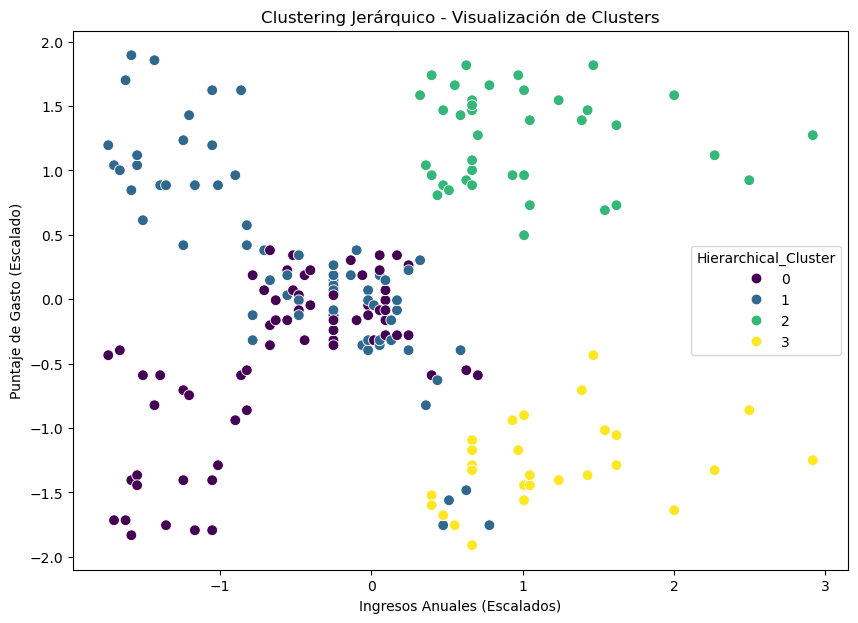

In [28]:
# Visualización de los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_scaled[:, 1], y=data_scaled[:, 2], hue=data['Hierarchical_Cluster'], palette='viridis', s=60)
plt.title('Clustering Jerárquico - Visualización de Clusters')
plt.xlabel('Ingresos Anuales (Escalados)')
plt.ylabel('Puntaje de Gasto (Escalado)')
plt.show()

In [27]:
# Mostrar métricas
print(f"Silhouette Score: {silhouette_hierarchical:.2f}")
print(f"Calinski-Harabasz Index: {calinski_hierarchical:.2f}")
print(f"Davies-Bouldin Index: {davies_hierarchical:.2f}")

Silhouette Score: 0.36
Calinski-Harabasz Index: 102.02
Davies-Bouldin Index: 1.02
